In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path1 = """D:\\all\\all project\\Quanvolution proj\\sent_file\\sent_file\\all_all_runs_history.json"""
path2 = """D:\\all\\all project\\Quanvolution proj\\sent_file\\sent_file\\quantums_all_runs_history.json"""
with open(path1, "r") as file:
    data1 = json.load(file)
with open(path2, "r") as file:
    data2 = json.load(file)
arg_data = {}
arg_data["baseline_cnn"] = data1["baseline_cnn"]
arg_data["quantum_saliencymix"] = data2["quantum_saliencymix"]
arg_data["quantum_saliencymix_offset"] = data2["quantum_saliencymix_offset"]
print (arg_data)

{'baseline_cnn': {'train_loss': [[2.38431870089888, 2.1362096122090852, 1.8102895868898004, 1.566263632186781, 1.391493320465088, 1.241580896467959, 1.1018334211896381, 0.9723852353073409, 0.851208609427321, 0.7344464642741669, 0.6286370841812748, 0.529599786652208, 0.45727608328181985, 0.3958994970784933, 0.3378765738405888, 0.30756892850048734, 0.28768146306417564, 0.2827302672286734, 0.26483670999936015, 0.26069924701446606, 0.2608580830820364, 0.25330202140231833, 0.2527335385716922, 0.2585445627640774, 0.2555718869677087, 0.25858066721832584, 0.261449569032938, 0.2621540217461744, 0.2580046086655974, 0.2619011621763356, 0.24356161305124727, 0.23571264178831997, 0.23007952365406317, 0.220857768650586, 0.2182573663044315, 0.2101043143896695, 0.20266015799407144, 0.20776693272223404, 0.19859407898656564, 0.19570728921071048, 0.18595763814957786, 0.18400793564969328, 0.1815412482026064, 0.17417075107165422, 0.17387491990745915, 0.1649465585630652, 0.1666632045713646, 0.159496315706397

In [8]:
def process(info, metric='acc'):
    names = ["baseline_cnn", "quantum_saliencymix", "quantum_saliencymix_offset"]
    color_set = [ "#20C914","#FC0B2FFF", "#0E8CD4EE"]
    plt.figure(figsize=(12, 5))
    for idx, _ in enumerate(names):
        val_folds = info[_]["val_" + metric]
        mean = np.mean(val_folds, axis=0)
        std = np.std(val_folds, axis=0)

        epochs = np.arange(1, len(mean) + 1)
        plt.plot(epochs, mean, label=_, color = color_set[idx])
        plt.fill_between(epochs,
                        mean - std,
                        mean + std,
                        alpha=0.2,
                        color = color_set[idx]
                        )
        surplus = "loss"
        if metric =='acc':
            surplus = "accuracy"
        plt.title(f"Validation {surplus} across folds")
        plt.xlabel("Epochs")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
    plt.show()

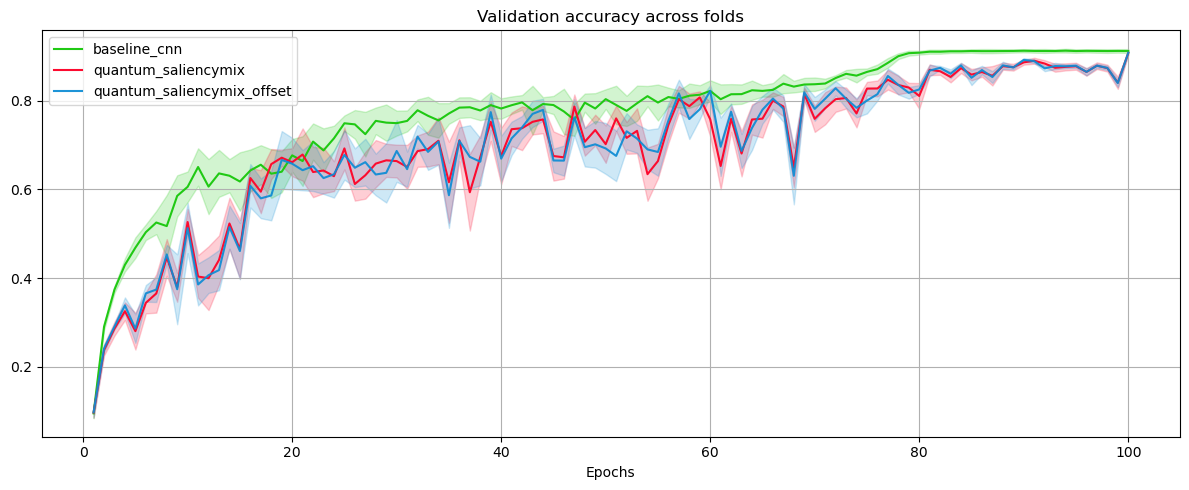

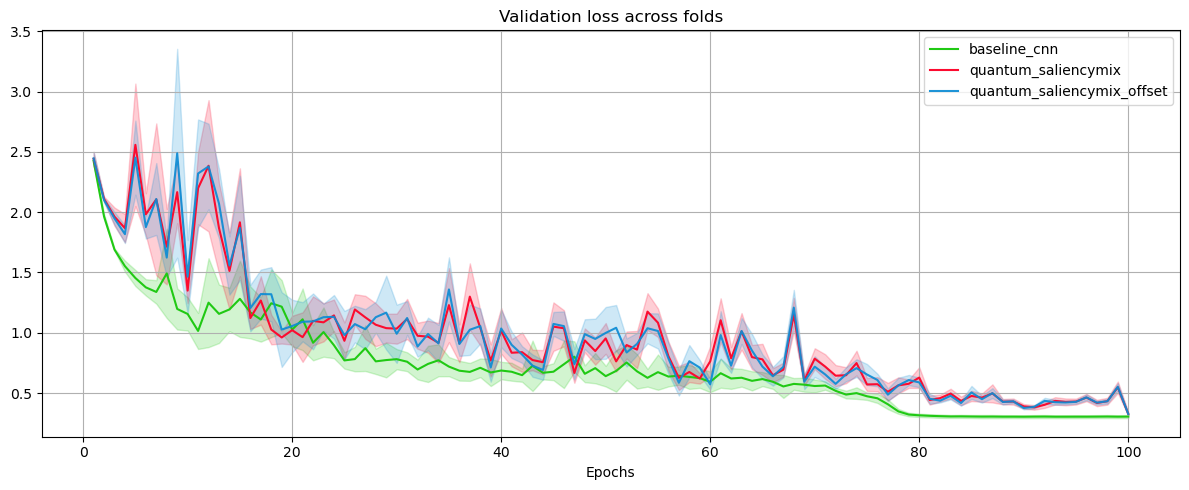

In [9]:
process(arg_data)
process(arg_data, metric="loss")